## Import libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Source
from sklearn.tree import export_graphviz
import os

# Dataset Preparation

Load data

First 5 rows with exact feature names:
         ID Diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  worst_radius  w

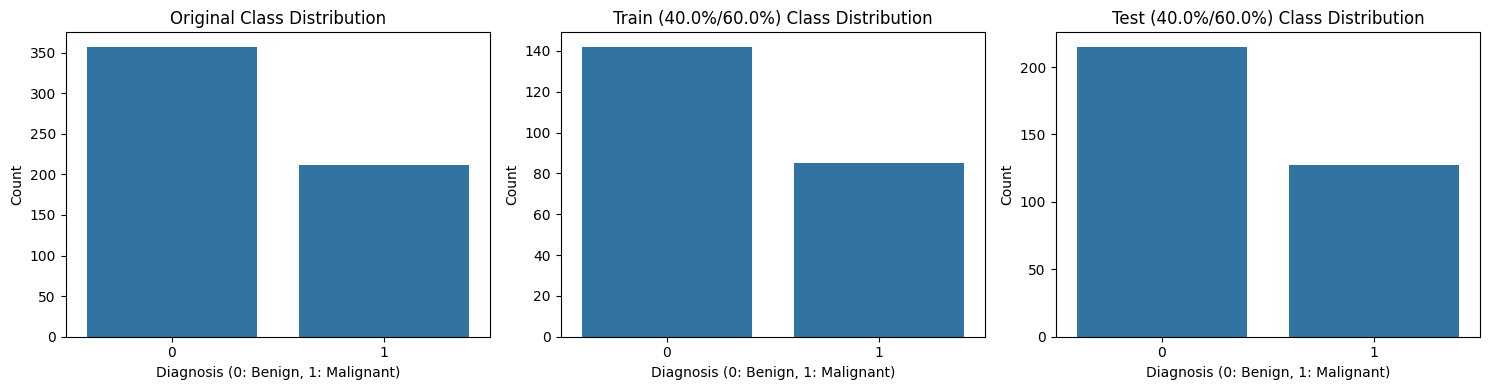


Proportions for 40.0%/60.0% split:
Original class distribution (%): Diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64
Train class distribution (%): Diagnosis
0    62.555066
1    37.444934
Name: proportion, dtype: float64
Test class distribution (%): Diagnosis
0    62.865497
1    37.134503
Name: proportion, dtype: float64


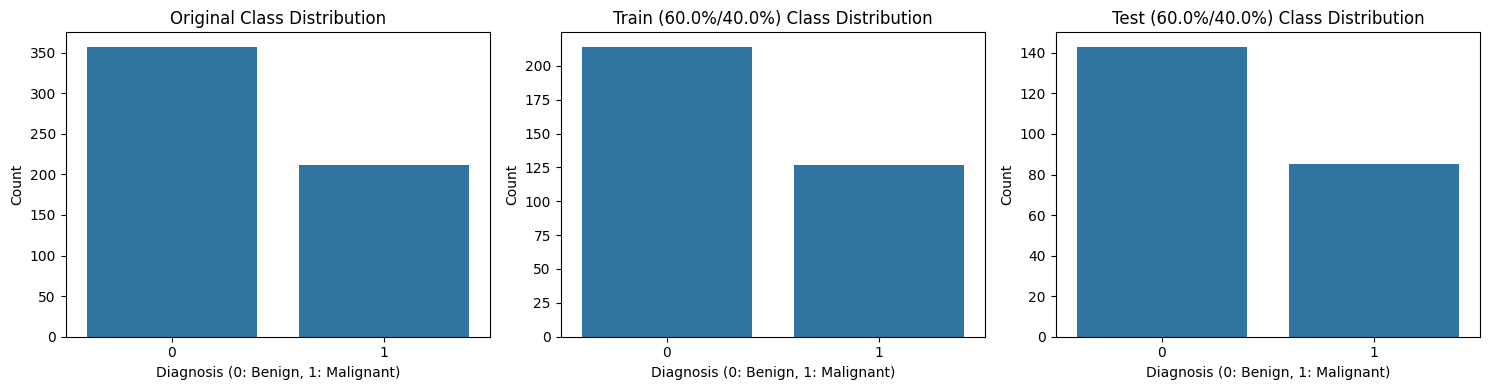


Proportions for 60.0%/40.0% split:
Original class distribution (%): Diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64
Train class distribution (%): Diagnosis
0    62.756598
1    37.243402
Name: proportion, dtype: float64
Test class distribution (%): Diagnosis
0    62.719298
1    37.280702
Name: proportion, dtype: float64


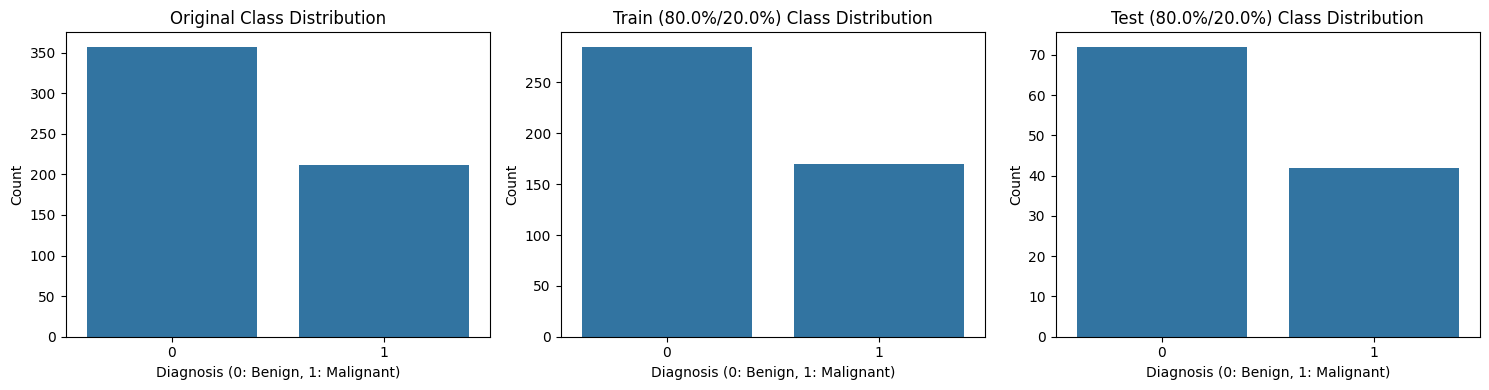


Proportions for 80.0%/20.0% split:
Original class distribution (%): Diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64
Train class distribution (%): Diagnosis
0    62.637363
1    37.362637
Name: proportion, dtype: float64
Test class distribution (%): Diagnosis
0    63.157895
1    36.842105
Name: proportion, dtype: float64


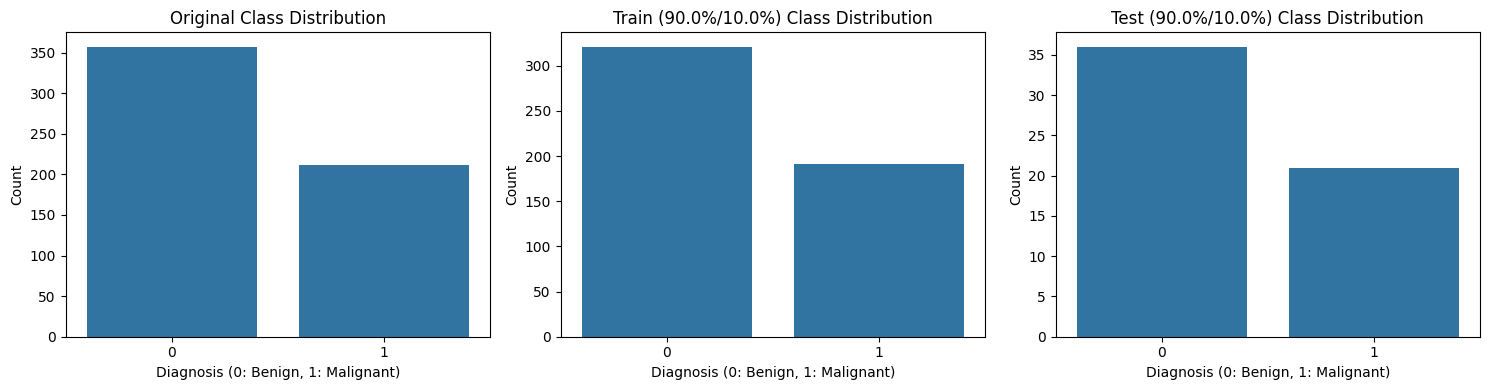


Proportions for 90.0%/10.0% split:
Original class distribution (%): Diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64
Train class distribution (%): Diagnosis
0    62.695312
1    37.304688
Name: proportion, dtype: float64
Test class distribution (%): Diagnosis
0    63.157895
1    36.842105
Name: proportion, dtype: float64


In [5]:
feature_names = [
    'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness',
    'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry',
    'mean_fractal_dimension', 'se_radius', 'se_texture', 'se_perimeter', 'se_area',
    'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry',
    'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
    'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points',
    'worst_symmetry', 'worst_fractal_dimension'
]
data_columns = ['ID', 'Diagnosis'] + feature_names
data_path = './Dataset/breast+cancer+wisconsin+diagnostic/wdbc.data'
data = pd.read_csv(data_path, header=None, names=data_columns)

print("First 5 rows with exact feature names:")
print(data.head())
print("Breast Cancer - Data shape:", data.shape)

# Preprocess
X = data.drop(['ID', 'Diagnosis'], axis=1)  # Features
Y = data['Diagnosis'].map({'M': 1, 'B': 0})  # Target: M=1, B=0

# Scale features
scaler_data = StandardScaler()
X_scaled = scaler_data.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)  # For display purposes

print("Breast Cancer - Features shape:", X_scaled.shape)
print("Breast Cancer - Target shape:", Y.shape)
print("\nSample of scaled features with exact names (first 5 rows):")
print(X_scaled_df.head())
print("\nSample of labels (first 5):")
print(Y.head())

# Data Exploration
print("\nData summary:")
print(data.describe())
print("\nMissing values:")
print(data.isnull().sum())

# Split proportions and perform
proportions = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
subsets = {}

for train_size, test_size in proportions:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, Y, train_size=train_size, test_size=test_size,
        stratify=Y, shuffle=True, random_state=42
    )
    
    # Store subsets
    subsets[f'feature_train_{int(train_size*100)}'] = X_train
    subsets[f'label_train_{int(train_size*100)}'] = y_train
    subsets[f'feature_test_{int(test_size*100)}'] = X_test
    subsets[f'label_test_{int(test_size*100)}'] = y_test
    
    # Visualize class distributions
    plt.figure(figsize=(15, 4))
    
    # Original dataset
    plt.subplot(1, 3, 1)
    sns.countplot(x=Y, order=[0, 1])
    plt.title('Original Class Distribution')
    plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
    plt.ylabel('Count')
    
    # Training set
    plt.subplot(1, 3, 2)
    sns.countplot(x=y_train, order=[0, 1])
    plt.title(f'Train ({train_size*100}%/{test_size*100}%) Class Distribution')
    plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
    plt.ylabel('Count')
    
    # Test set
    plt.subplot(1, 3, 3)
    sns.countplot(x=y_test, order=[0, 1])
    plt.title(f'Test ({train_size*100}%/{test_size*100}%) Class Distribution')
    plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    # Print class distribution proportions
    print(f"\nProportions for {train_size*100}%/{test_size*100}% split:")
    print("Original class distribution (%):", Y.value_counts(normalize=True) * 100)
    print("Train class distribution (%):", y_train.value_counts(normalize=True) * 100)
    print("Test class distribution (%):", y_test.value_counts(normalize=True) * 100)

BUILD TREE



## Building Decision Tree Classifiers

Decision Tree for 40.0%/60.0% split trained and visualized.


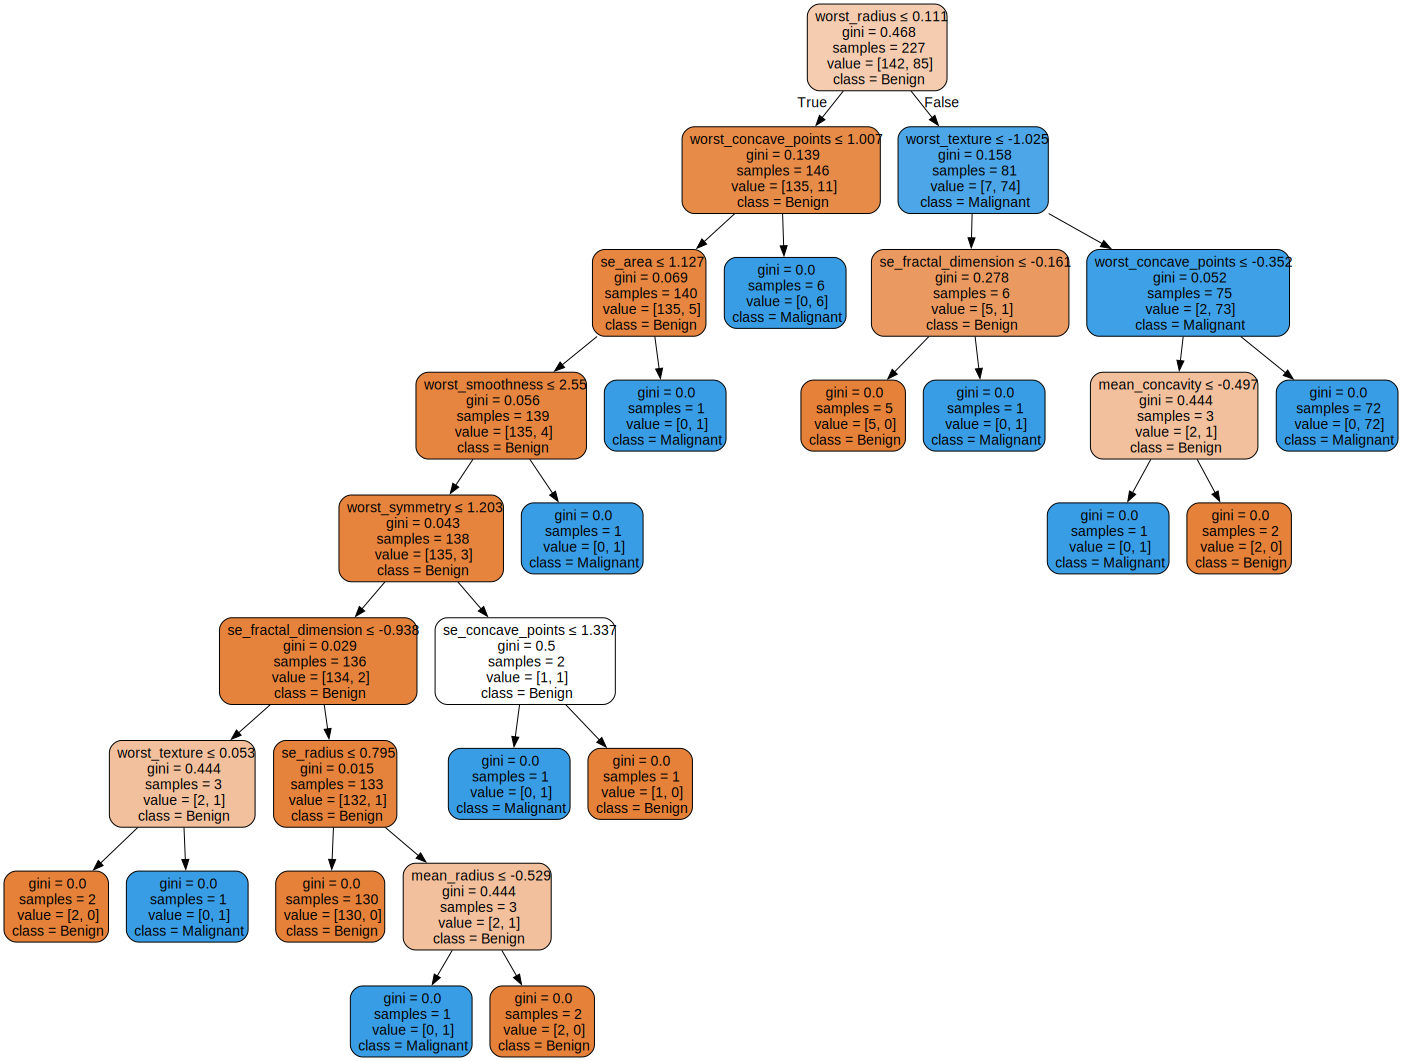


Decision Tree for 60.0%/40.0% split trained and visualized.


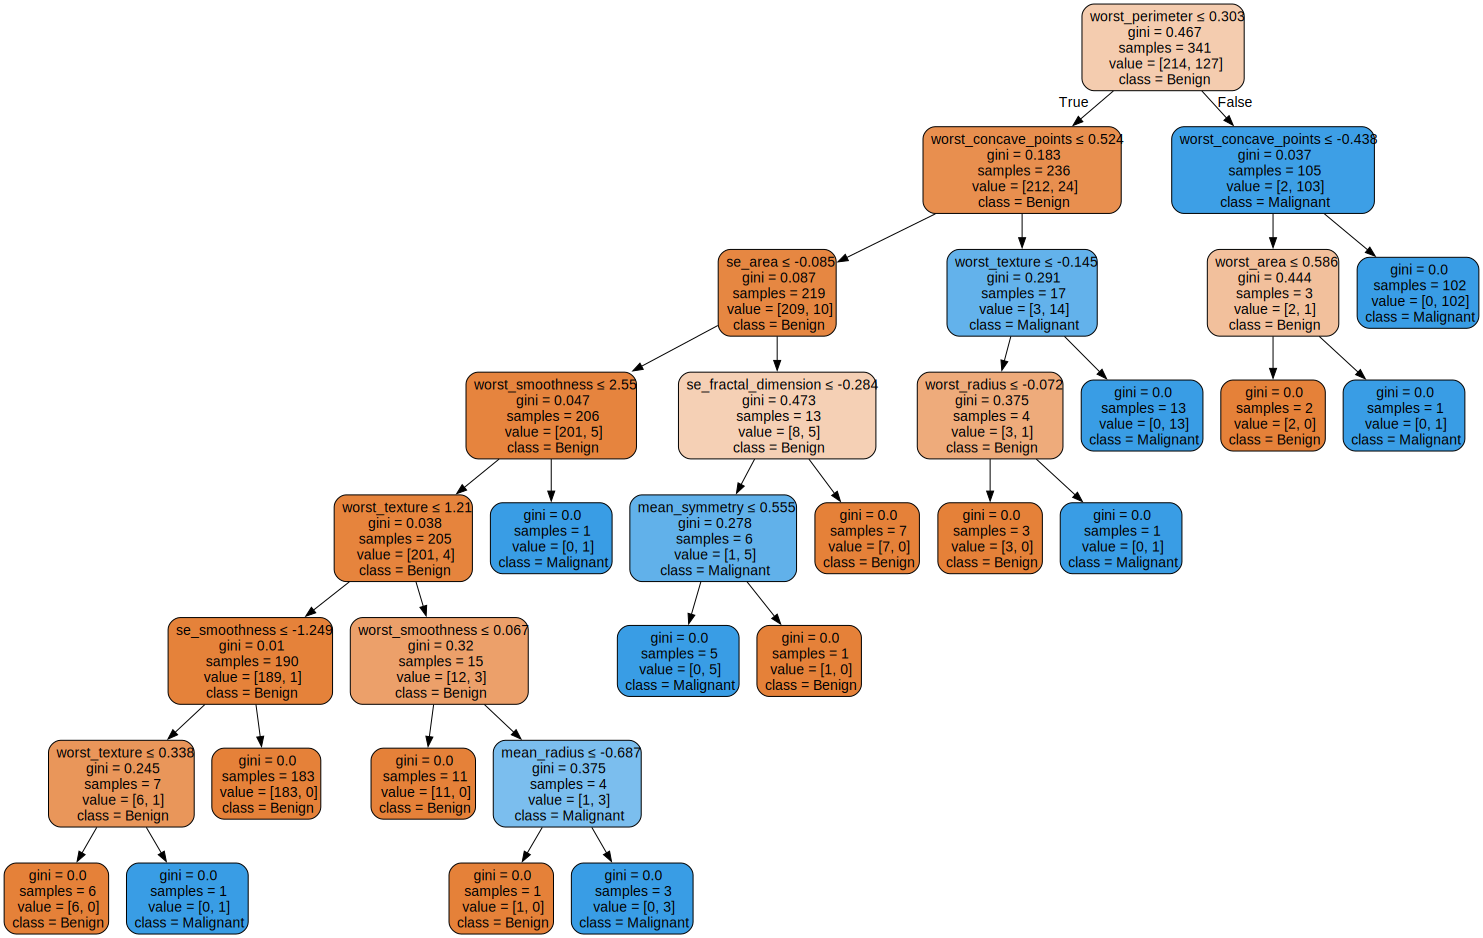


Decision Tree for 80.0%/20.0% split trained and visualized.


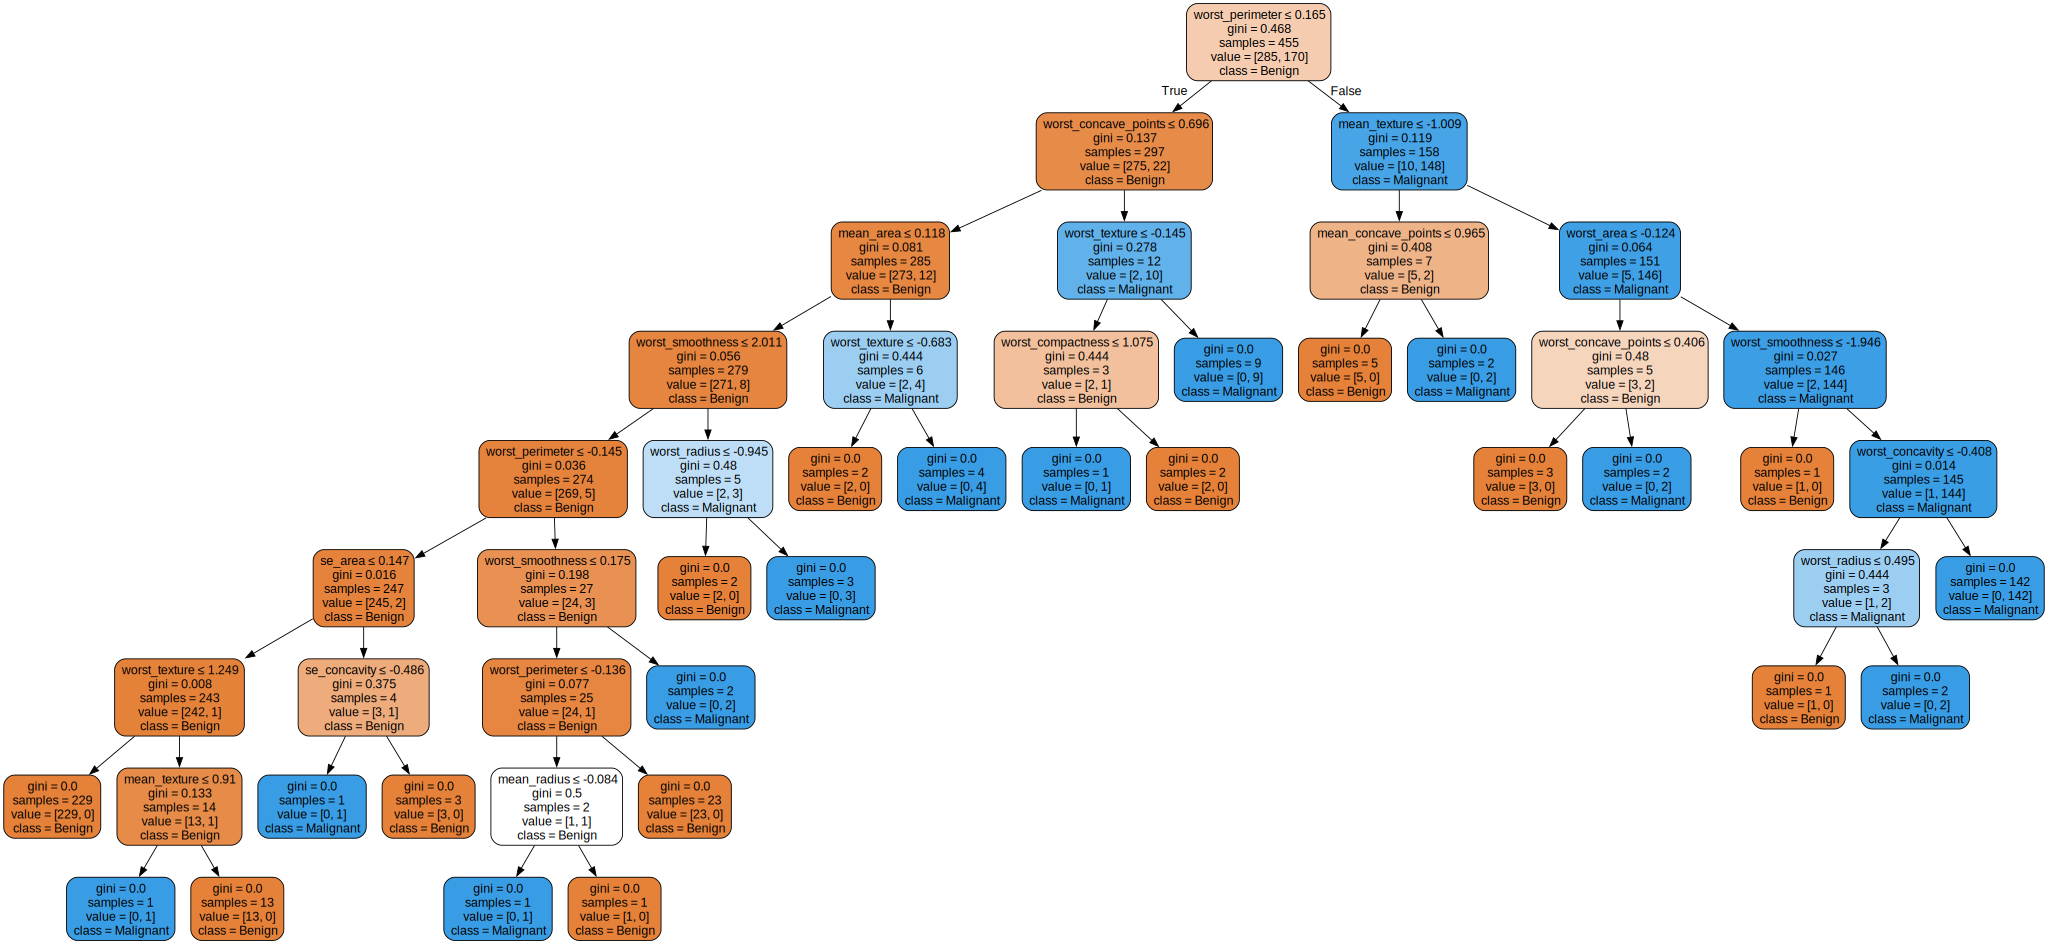


Decision Tree for 90.0%/10.0% split trained and visualized.


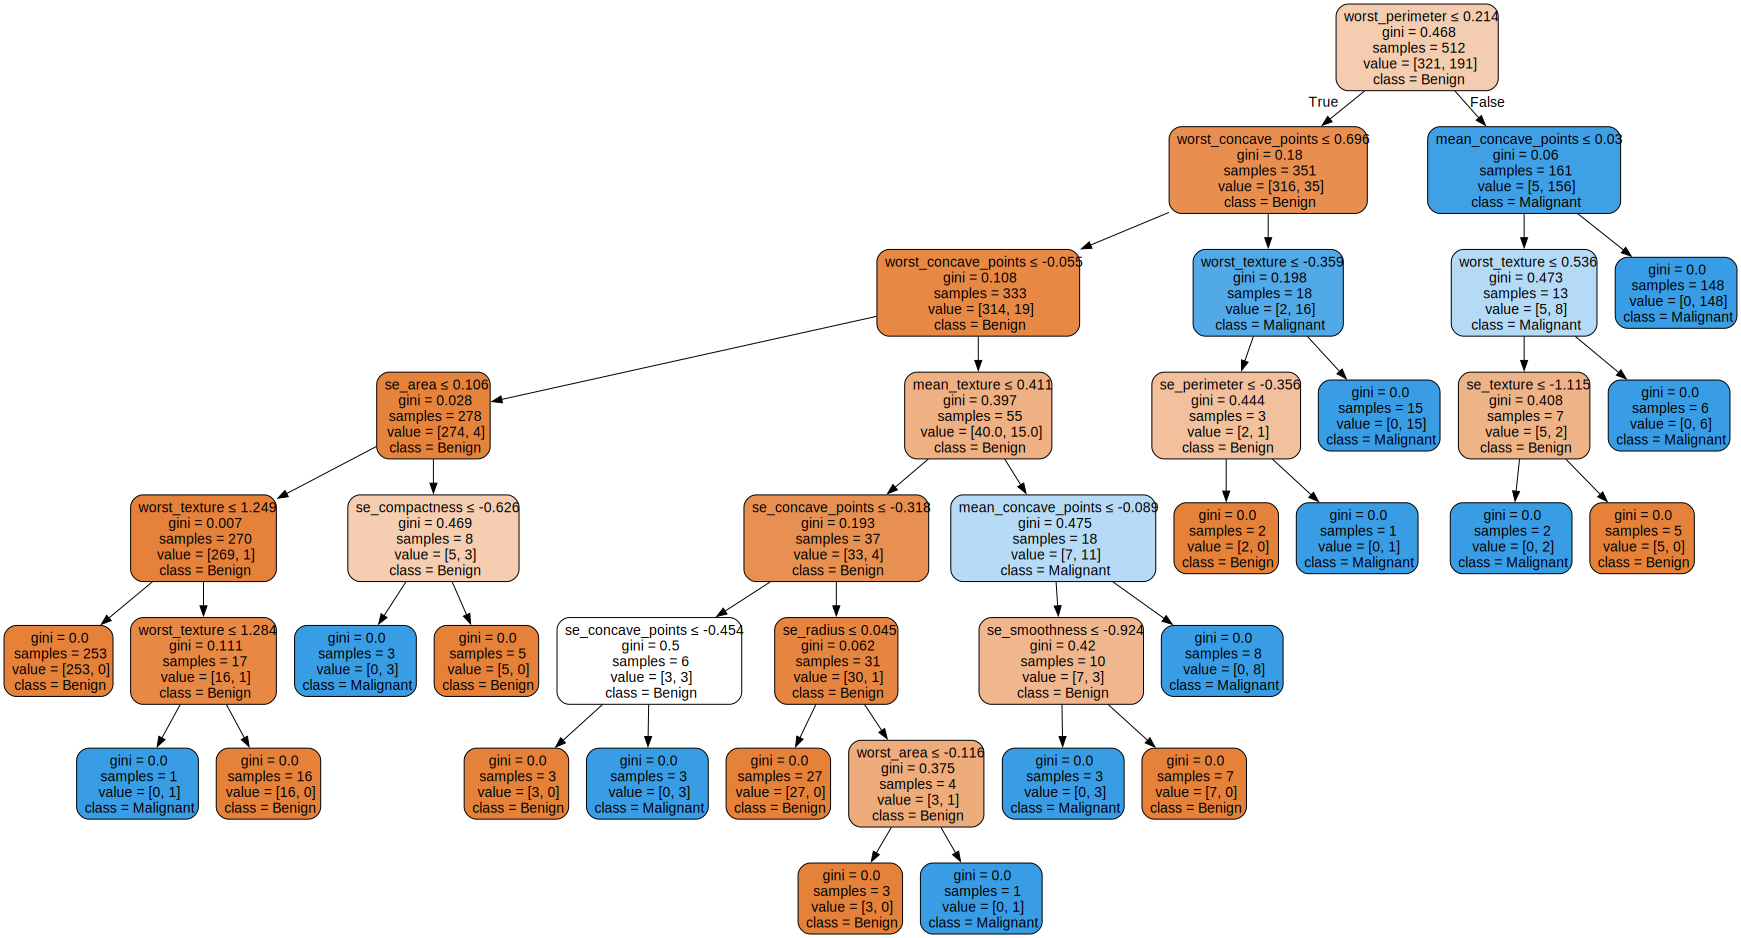

In [6]:
# Section 2.2: Building Decision Tree Classifiers
print("\n## Building Decision Tree Classifiers")
for train_size, test_size in proportions:
    # Retrieve subsets
    X_train = subsets[f"feature_train_{int(train_size*100)}"]
    y_train = subsets[f"label_train_{int(train_size*100)}"]
    X_test = subsets[f"feature_test_{int(test_size*100)}"]
    y_test = subsets[f"label_test_{int(test_size*100)}"]

    # Train decision tree
    clf = DecisionTreeClassifier(criterion="gini", random_state=42)
    clf.fit(X_train, y_train)

    # Export and visualize the tree
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_names,
        class_names=["Benign", "Malignant"],
        filled=True,
        rounded=True,
        special_characters=True,
    )
    graph = Source(dot_data)
    print(
        f"\nDecision Tree for {train_size*100}%/{test_size*100}% split trained and visualized."
    )
    display(graph)


Split proportions and perform 


## Evaluating Decision Tree Classifiers

Classification Report for 40.0%/60.0% split:
              precision    recall  f1-score   support

      Benign       0.94      0.95      0.94       215
   Malignant       0.91      0.89      0.90       127

    accuracy                           0.93       342
   macro avg       0.92      0.92      0.92       342
weighted avg       0.93      0.93      0.93       342



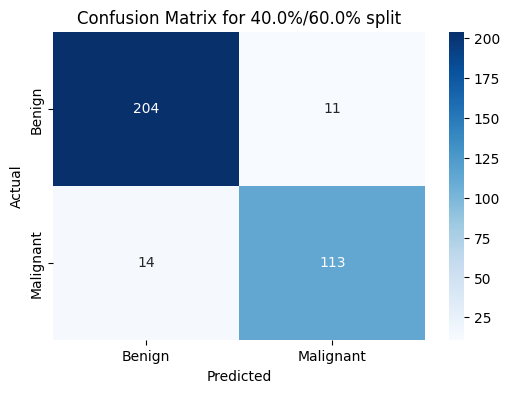


Classification Report for 60.0%/40.0% split:
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96       143
   Malignant       0.96      0.91      0.93        85

    accuracy                           0.95       228
   macro avg       0.95      0.94      0.95       228
weighted avg       0.95      0.95      0.95       228



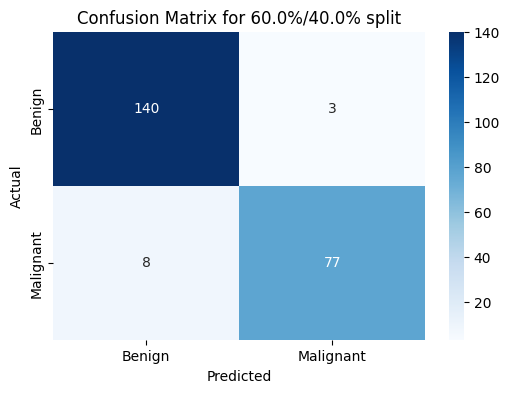


Classification Report for 80.0%/20.0% split:
              precision    recall  f1-score   support

      Benign       0.94      0.94      0.94        72
   Malignant       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



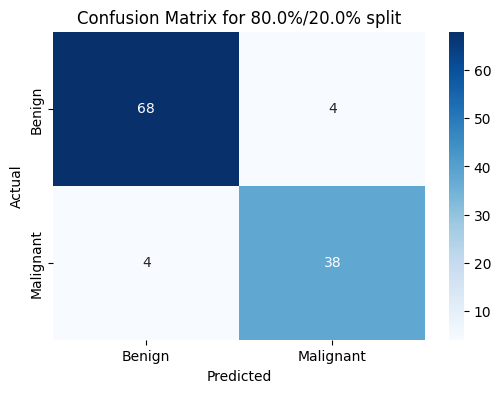


Classification Report for 90.0%/10.0% split:
              precision    recall  f1-score   support

      Benign       0.92      0.97      0.95        36
   Malignant       0.95      0.86      0.90        21

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57



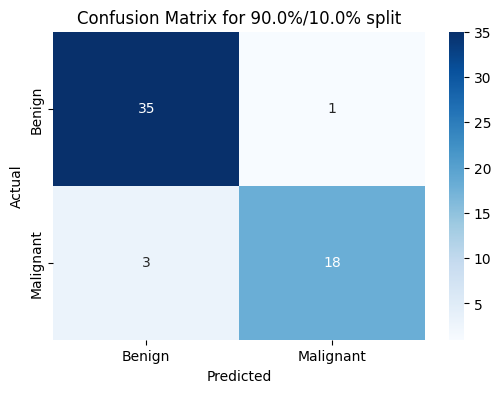

In [7]:
# Section 2.3: Evaluating Decision Tree Classifiers
print("\n## Evaluating Decision Tree Classifiers")
for train_size, test_size in proportions:
    # Retrieve subsets
    X_train = subsets[f'feature_train_{int(train_size*100)}']
    y_train = subsets[f'label_train_{int(train_size*100)}']
    X_test = subsets[f'feature_test_{int(test_size*100)}']
    y_test = subsets[f'label_test_{int(test_size*100)}']
    
    # Train decision tree
    clf = DecisionTreeClassifier(criterion='gini', random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = clf.predict(X_test)
    
    # Classification report
    print(f"\nClassification Report for {train_size*100}%/{test_size*100}% split:")
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix for {train_size*100}%/{test_size*100}% split')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## Depth and Accuracy Analysis (80/20 Split)

Decision Tree for max_depth=None (80/20 split)'


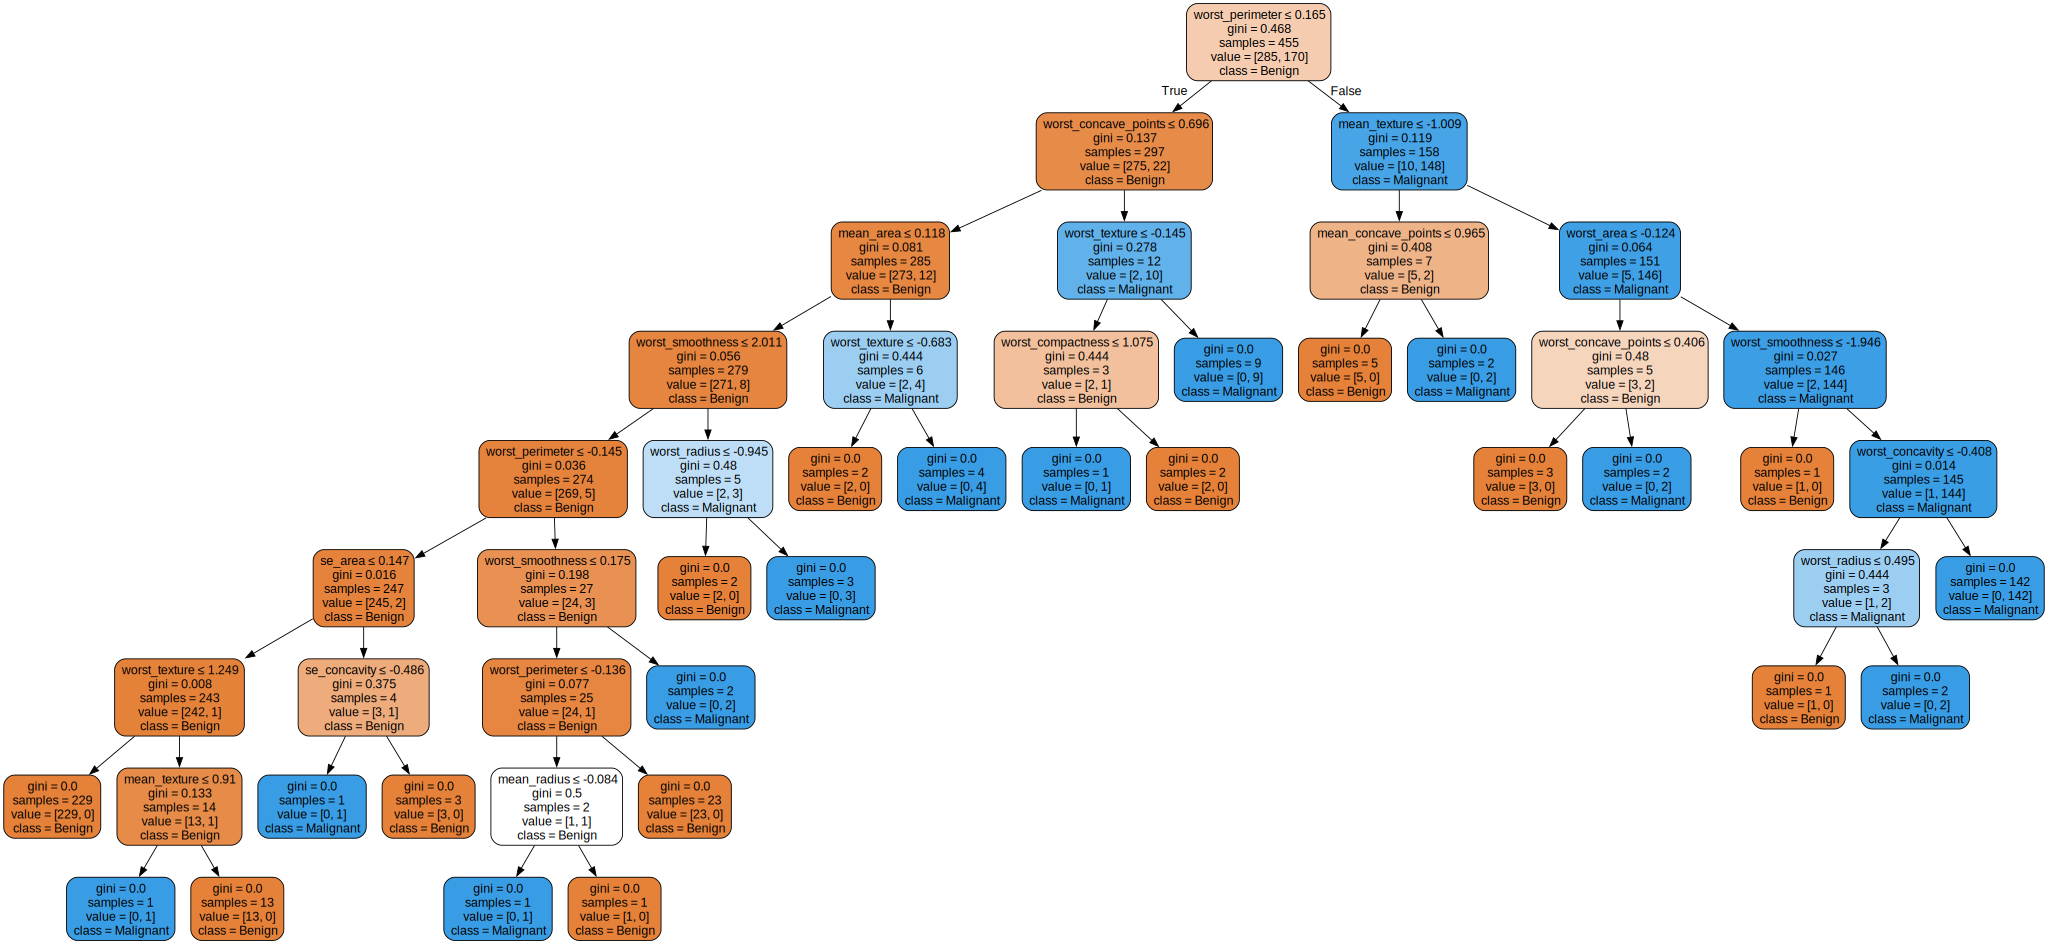


Decision Tree for max_depth=2 (80/20 split)'


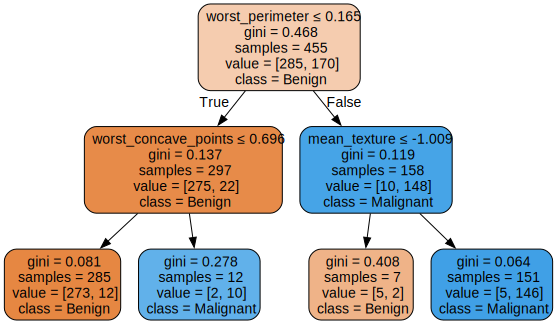


Decision Tree for max_depth=3 (80/20 split)'


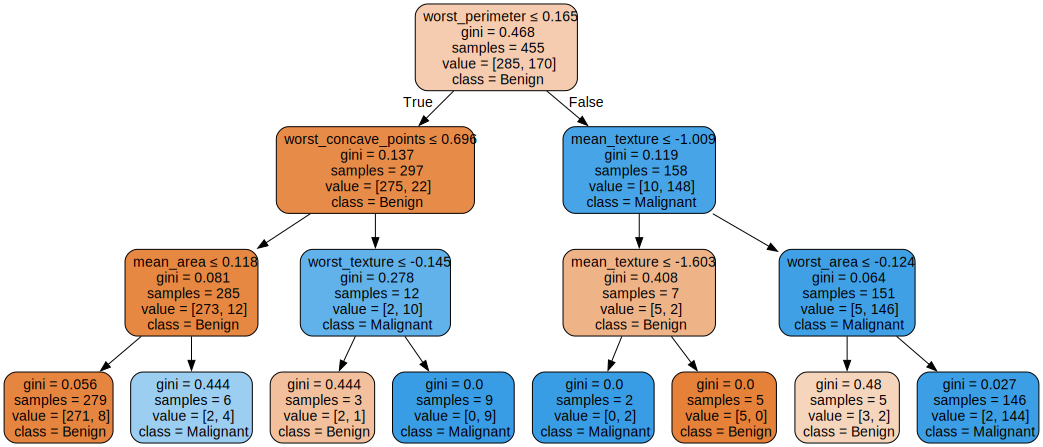


Decision Tree for max_depth=4 (80/20 split)'


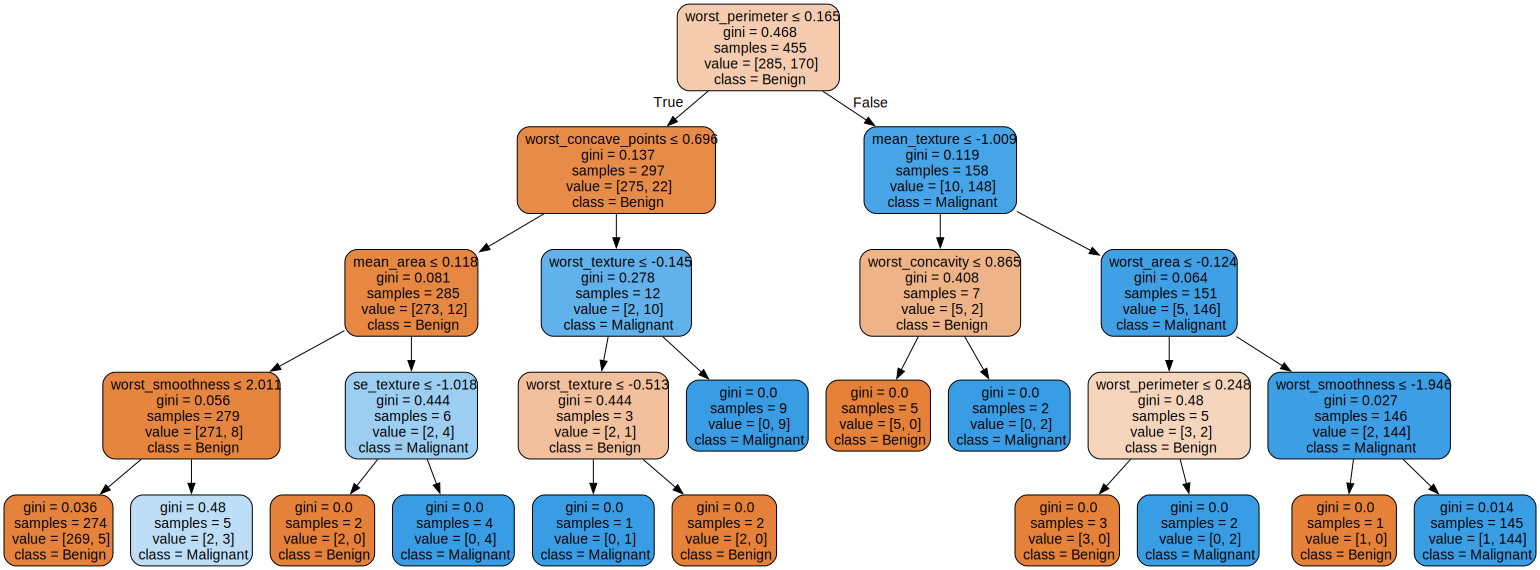


Decision Tree for max_depth=5 (80/20 split)'


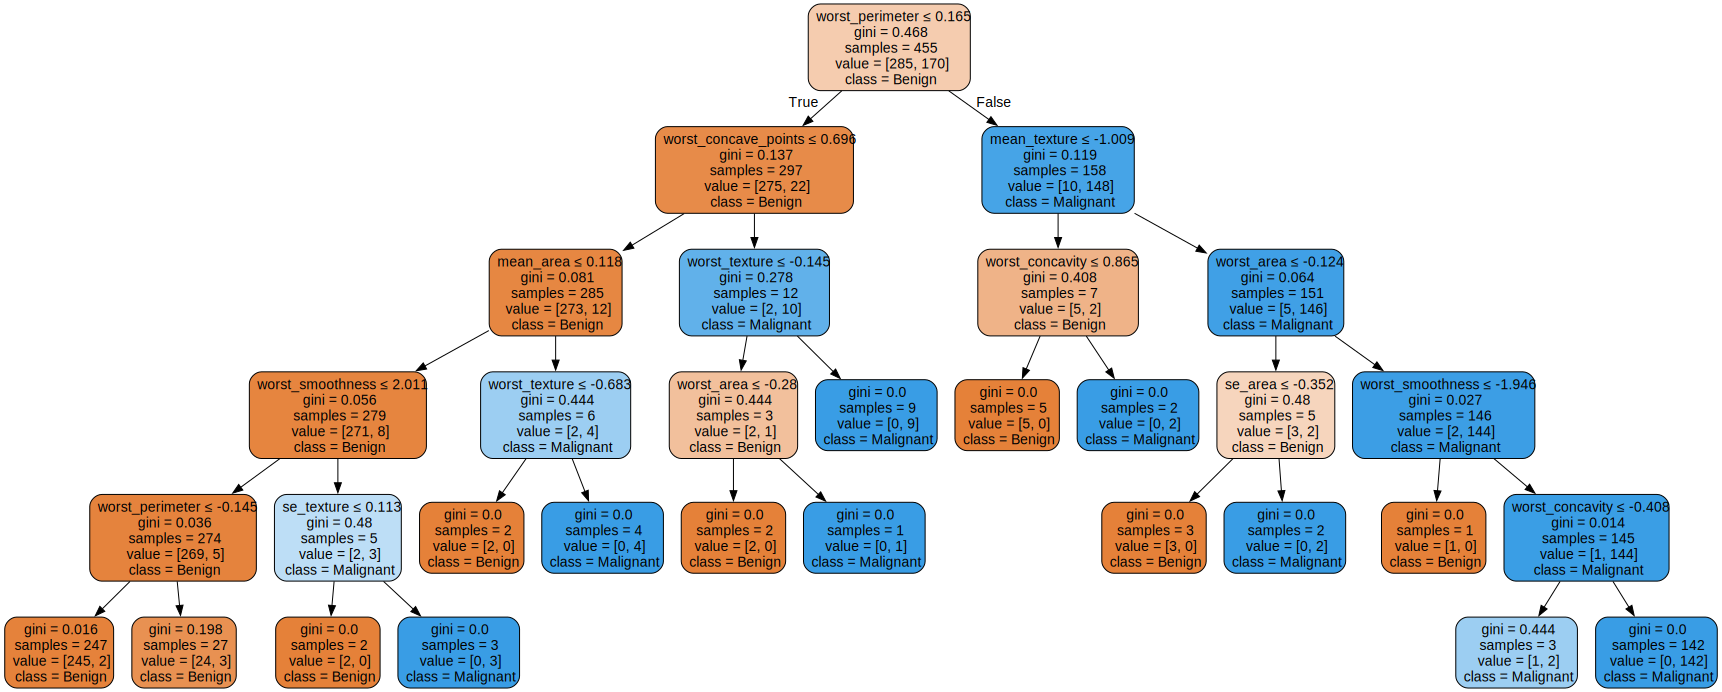


Decision Tree for max_depth=6 (80/20 split)'


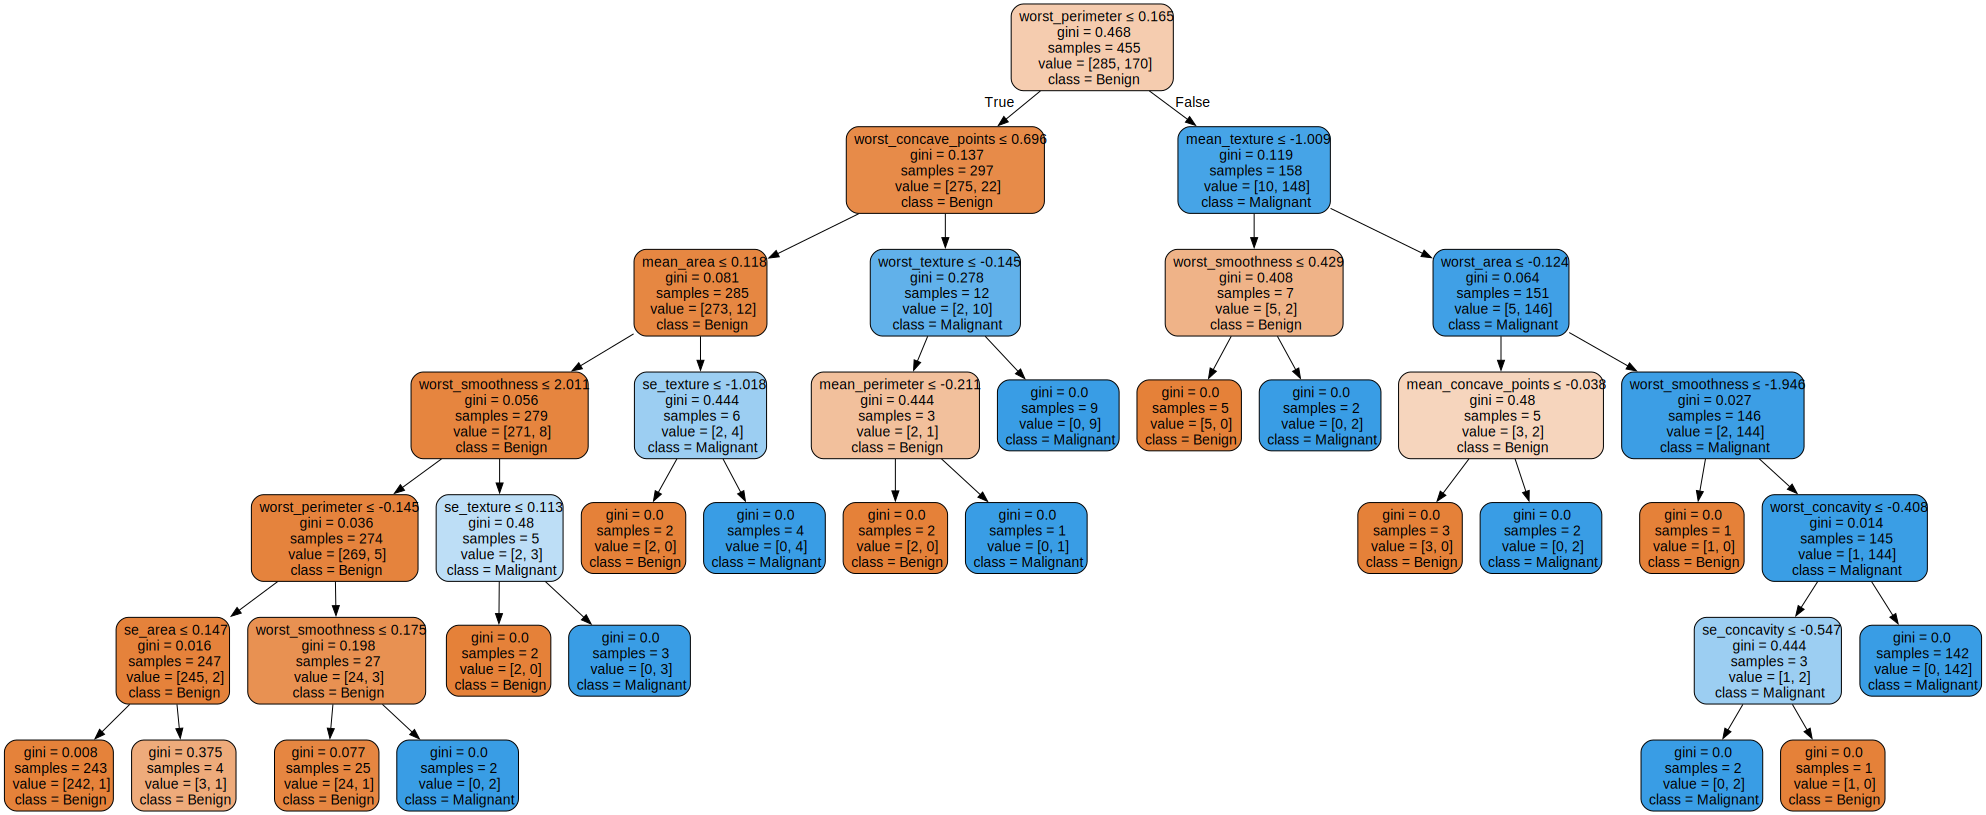


Decision Tree for max_depth=7 (80/20 split)'


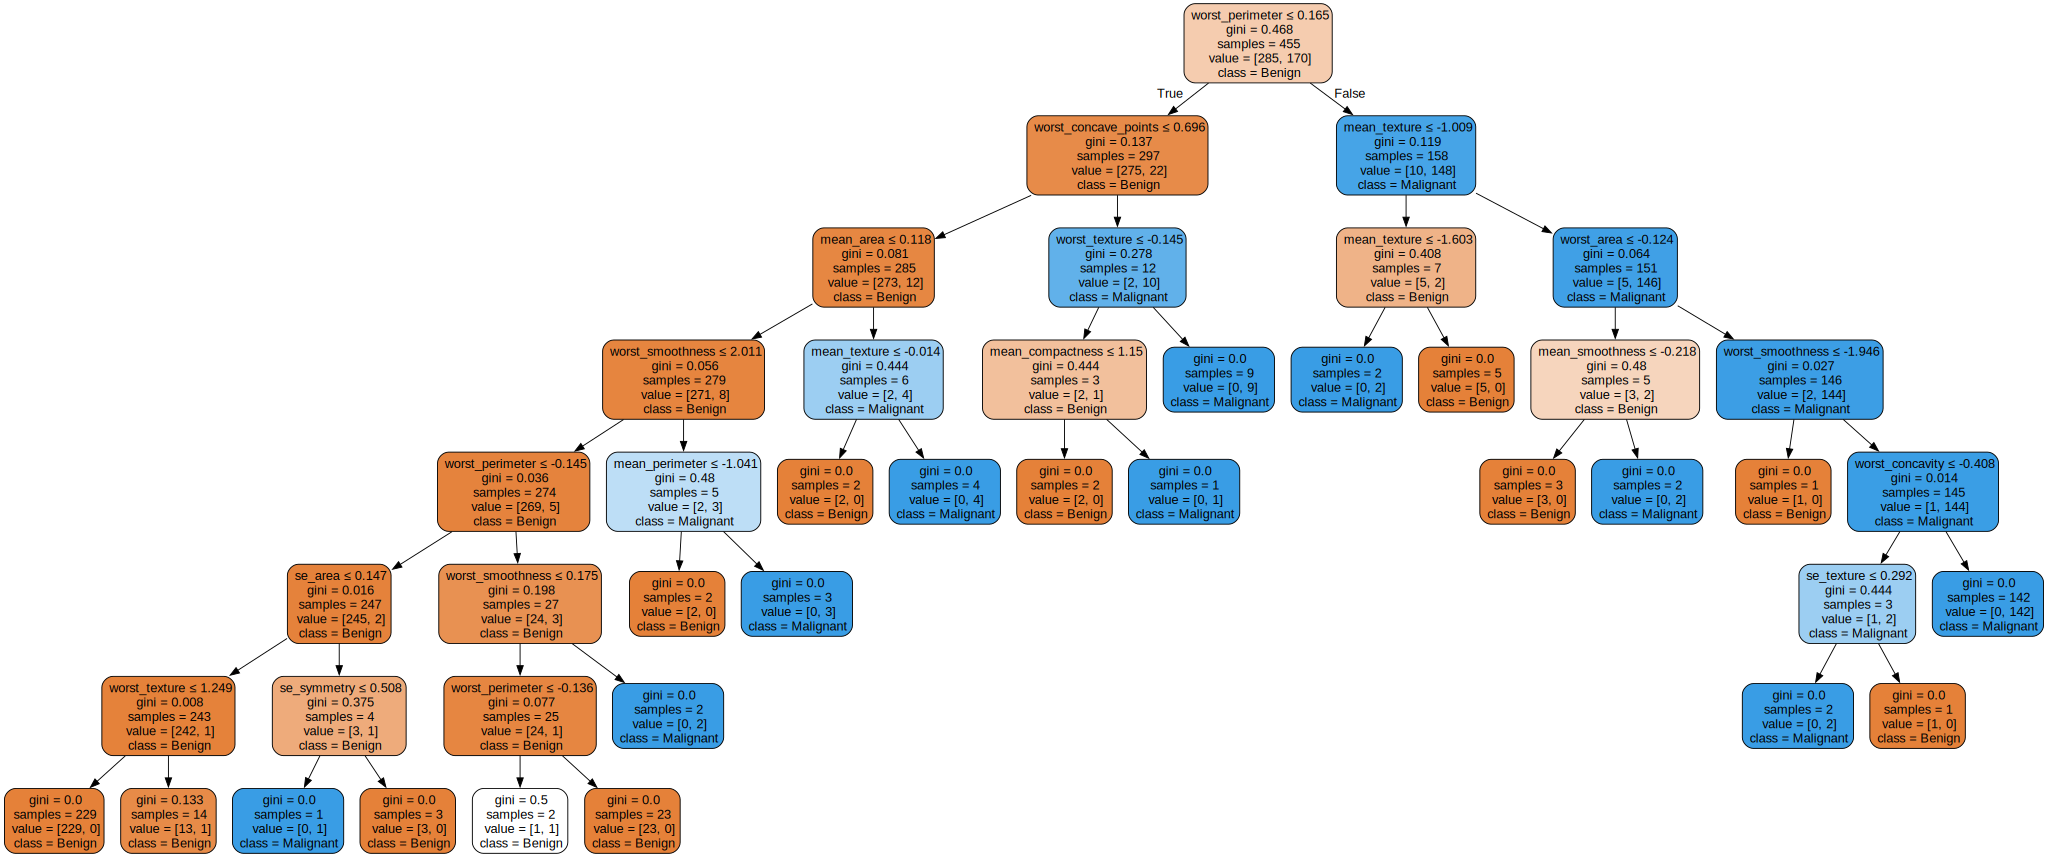


Accuracy Table for 80/20 Split:
   max_depth  Accuracy
0        NaN  0.929825
1        2.0  0.921053
2        3.0  0.903509
3        4.0  0.912281
4        5.0  0.921053
5        6.0  0.921053
6        7.0  0.938596


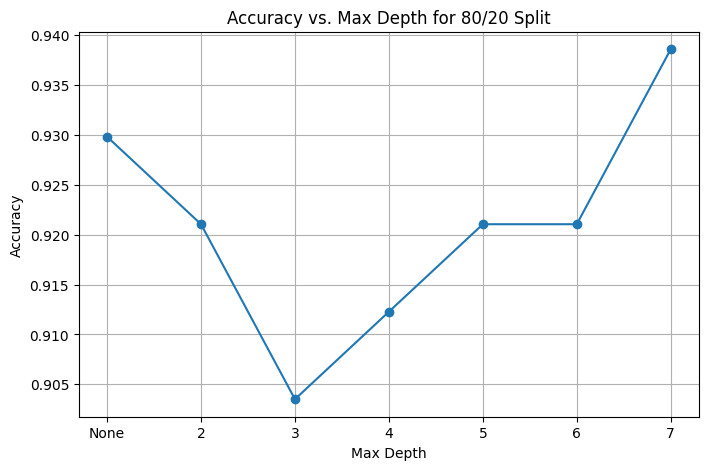


Insights on Depth and Accuracy:
- Lower depths (e.g., 2, 3) may underfit, leading to lower accuracy due to oversimplification.
- Higher depths (e.g., 6, 7) or None may overfit, capturing noise in the training data.
- Optimal depth balances complexity and generalization, typically around 3–5 based on accuracy trends.


In [8]:
print("\n## Depth and Accuracy Analysis (80/20 Split)")
X_train = subsets["feature_train_80"]
y_train = subsets["label_train_80"]
X_test = subsets["feature_test_20"]
y_test = subsets["label_test_20"]

max_depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

for depth in max_depths:
    # Train decision tree with specified max_depth
    clf = DecisionTreeClassifier(criterion="gini", max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Visualize the tree
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_names,
        class_names=["Benign", "Malignant"],
        filled=True,
        rounded=True,
        special_characters=True,
    )
    graph = Source(dot_data)
    print(f"\nDecision Tree for max_depth={depth} (80/20 split)'")
    display(graph)

# Create accuracy table
accuracy_table = pd.DataFrame({"max_depth": max_depths, "Accuracy": accuracies})
print("\nAccuracy Table for 80/20 Split:")
print(accuracy_table)

# Plot accuracy vs. depth
plt.figure(figsize=(8, 5))
plt.plot(
    [str(d) if d is not None else "None" for d in max_depths], accuracies, marker="o"
)
plt.title("Accuracy vs. Max Depth for 80/20 Split")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Insights
print("\nInsights on Depth and Accuracy:")
print(
    "- Lower depths (e.g., 2, 3) may underfit, leading to lower accuracy due to oversimplification."
)
print(
    "- Higher depths (e.g., 6, 7) or None may overfit, capturing noise in the training data."
)
print(
    "- Optimal depth balances complexity and generalization, typically around 3–5 based on accuracy trends."
)